<a href="https://colab.research.google.com/github/dhanunjaireddy07/teslastockprediction/blob/main/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('Tesla.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date' )
df=df.dropna()

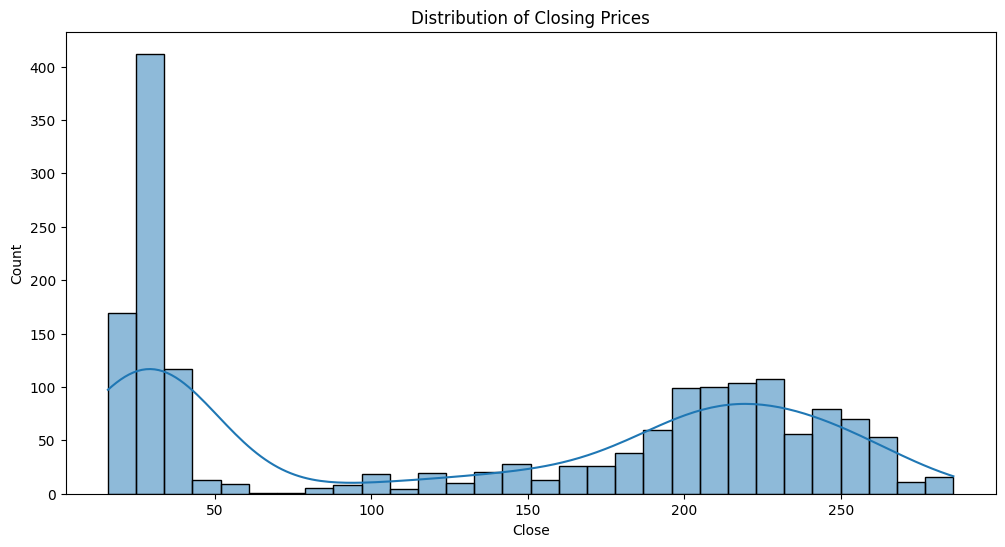

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Close'],bins=30,kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

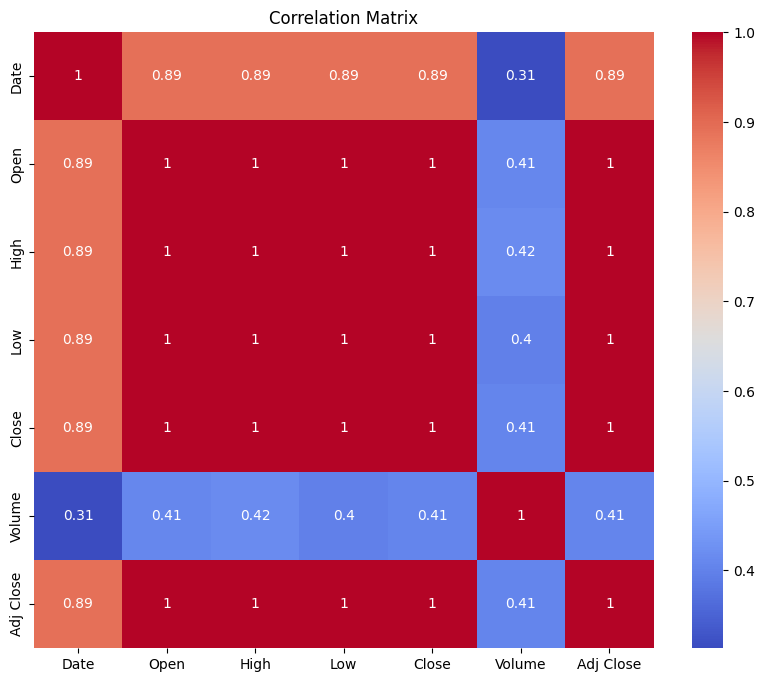

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['MA_5']=df['Close'].rolling(window=5).mean()
df['MA_10']=df['Close'].rolling(window=10).mean()
df=df.dropna()
x=df[['Open','High','Low','Volume','MA_5','MA_10']]
y=df['Close']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)


In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R2 Score: {r2}')


Mean Squared Error (MSE): 1.5968889443778809
Mean Absolute Error (MAE): 0.8356857515063195
R2 Score: 0.9998223665436492
